
---------------
# Airline Data Challenge - Capital One Data Challenge
### by **Sreephani Devireddy**
---------------


## Context:
- The airline company is considering entry into the US domestic market and seeks recommendations to inform its business decisions. 
- This analysis is based on three datasets: flights, tickets, and airport codes. 
- Additionally, information on costs and revenues has been provided. Detailed descriptions of the variables within these datasets will be presented subsequently in the analysis.

## TASK - ANALYZE DATA TO ANSWER BELOW QUESTIONS

1. The 10 busiest round trip routes in terms of number of round trip flights in the quarter. Exclude canceled flights when performing the calculation.
2. The 10 most profitable round trip routes (without considering the upfront airplane cost) in the quarter. Along with the profit, show total revenue, total cost, summary values of other key components and total round trip flights in the quarter for the top 10 most profitable routes. Exclude canceled flights from these calculations.
3. The 5 round trip routes that you recommend to invest in based on any factors that you choose.
4. The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trip routes that you recommend. Print key summary components for these routes.
5. Key Performance Indicators (KPI’s) that you recommend tracking in the future to measure the success of the round trip routes that you recommend.

## Approach to Dataset Analysis


### 1. Data Loading:
- **Objective**: Efficiently load and prepare datasets for analysis.
- **Methodology**: 
    - Implement reusable code to load the flights, tickets, and airport_codes datasets.
### 2. Data Quality Checks:
- **Objective**: Ensure the integrity and reliability of data.
- **Methodology**:
    - Conduct thorough checks for mixed data types, missing values, null values, outliers, and duplicates across the flights, tickets, and airport_codes datasets.
### 3. Data Cleaning:
- **Objective**: Prepare clean and consistent datasets for accurate analysis.
- **Methodology**: 
    - Remove duplicates where appropriate to maintain data integrity.
    - Correct mixed data types by converting variables to their appropriate formats.
    - Address missing values and outliers using suitable imputation methods based on the context.
### 4. Data Filtering:
- **Objective**: Refine datasets to align with the specific requirements of the analysis.
- **Methodology**:
    - Restrict the datasets to include only medium and large airports within the United States.
    - Ensure all data pertains to the US domestic market by filtering airports and flights accordingly.
### 5. Feature Engineering:
- **Objective**: Enhance datasets to answer analytical questions effectively.
- **Methodology**:
    - Create additional columns and features as necessary to provide insights and respond to specific analytical questions.

## Approach to Coding

- To ensure reusability and scalability, I will create independent functions for specific tasks.
- For anyone who wants to run my notebook:
  - Make sure to change the path in the `read_csv()` function to match your file locations.
- At the end, I will render the code and submit the following:
  - My Python notebook.
  - An Excel file containing the new variables.
  - A presentation that overviews my analysis.

In [1]:
# For data manipulation:
import pandas as pd
import numpy as np
import statistics

# For plotting:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# RESULABLE CODES
- #### Below are functions that can be resulable in this entire notebook or for any other analysis

In [2]:
#Accessing the datasets
def read_csv(file_name):
    # Note: replace the file path below to fit your environment. 
    file_path = "/Users/sreephanireddy/Library/CloudStorage/OneDrive-Personal/FT_Prep/CapitalOne/data/" + file_name
    return pd.read_csv(file_path, low_memory=False)


# Function to optimize data types - RESULABLE CODE
def optimize_data_types(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
        elif df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
        elif df[col].dtype == 'object':
            # Replace NaN values with "null" for object type columns
            df[col] = df[col].fillna("null")
    return df


#Change CHAR datatypes to INT/FLOAT - RESULABLE CODE
def to_number(dataset,field_names):
    for field in field_names:
        dataset[field] = pd.to_numeric(dataset[field], errors='coerce')
    return dataset

#IMPUTING COLUMNS WITH MEDIAN - RESULABLE CODE
def impute_with_median(df, columns_to_impute):
    for column in columns_to_impute:
        values = [x for x in df[column] if pd.notna(x)]
        median_value = statistics.median(values)
        df[column].fillna(median_value, inplace=True)

#PIECHART - RESULABLE CODE
def plot_pie_chart(data, column_name):
    """
    Parameters:
    - data: DataFrame
    - column_name: str, the column for which to plot the pie chart
    """
    # Count the occurrences of each value in the specified column
    counts = data[column_name].value_counts()

    # Plot a pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=50)
    plt.title(f'Distribution of {column_name} Values')
    plt.show()

## LOADING DATASETS

In [3]:
airport_codes = read_csv("Airport_Codes.csv")
flights = read_csv("Flights.csv")
tickets = read_csv("Tickets.csv")

## DATA QUALITY CHECKS FOR ALL THREE DATASETS

## Exploratory Data Analysis on AIRPORT_CODES data

In [4]:
airport_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55369 entries, 0 to 55368
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          55369 non-null  object 
 1   NAME          55369 non-null  object 
 2   ELEVATION_FT  48354 non-null  float64
 3   CONTINENT     27526 non-null  object 
 4   ISO_COUNTRY   55122 non-null  object 
 5   MUNICIPALITY  49663 non-null  object 
 6   IATA_CODE     9182 non-null   object 
 7   COORDINATES   55369 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.4+ MB


In [5]:
#optimizing datatypes
airport_codes = optimize_data_types(airport_codes)
airport_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55369 entries, 0 to 55368
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          55369 non-null  object 
 1   NAME          55369 non-null  object 
 2   ELEVATION_FT  48354 non-null  float32
 3   CONTINENT     55369 non-null  object 
 4   ISO_COUNTRY   55369 non-null  object 
 5   MUNICIPALITY  55369 non-null  object 
 6   IATA_CODE     55369 non-null  object 
 7   COORDINATES   55369 non-null  object 
dtypes: float32(1), object(7)
memory usage: 3.2+ MB


### Filtering the dataset before performing data cleaning and EDA on columns
1. Filtering for large and medium airports
2. Restrict the data to only the airports within the US using their ISO codes

In [6]:
# Filter rows where TYPE is 'medium_airport' or 'large_airport'
airport_codes = airport_codes[airport_codes['TYPE'].isin(['medium_airport', 'large_airport'])]

In [7]:
# Keep only rows where ISO_COUNTRY is equal to 'US'
airport_codes = airport_codes[airport_codes['ISO_COUNTRY'] == 'US']
# Reset the index in place
airport_codes.reset_index(drop=True, inplace=True)

In [8]:
#checking if filter conditions are working right
airport_codes['TYPE'].unique()
#airport_codes['ISO_COUNTRY'].unique()

array(['medium_airport', 'large_airport'], dtype=object)

### Checking DataTypes of AIRPORT_CODES DATA

In [9]:
airport_codes.dtypes

TYPE             object
NAME             object
ELEVATION_FT    float32
CONTINENT        object
ISO_COUNTRY      object
MUNICIPALITY     object
IATA_CODE        object
COORDINATES      object
dtype: object

### Checking Duplicated rows

In [10]:
# Identify the duplicate rows 
duplicated_rows = airport_codes.duplicated()
duplicated_rows.unique()
#result - there are no duplicates

array([False])

In [11]:
#checking number of null values in each column
airport_codes.isnull().sum()

TYPE            0
NAME            0
ELEVATION_FT    3
CONTINENT       0
ISO_COUNTRY     0
MUNICIPALITY    0
IATA_CODE       0
COORDINATES     0
dtype: int64

### Remarks
1. we can drop the CONTINENT COLUMN and other columns as it is not useful for analysis
2. replace null values in IATA_CODE with "NULL"

### Dropping Columns 

In [12]:
#dropping unncessary columns
airport_codes=airport_codes.drop(['CONTINENT','ISO_COUNTRY','MUNICIPALITY','COORDINATES','ELEVATION_FT'],axis=1)

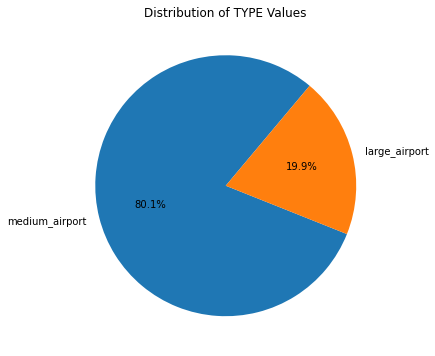

In [13]:
# Plotting the pie chart TYPE to visualize the relative percentages of larger and medium airports
# I can also plot the bar graph of the TYPE
# plot_bar_chart_with_percentages(airport_codes_clean, 'TYPE')
plot_pie_chart(airport_codes, 'TYPE')

#### Remarks: 
- After cleaning, data depicts that the medium airports represent 80.1% 

## Exploratory Data Analysis on FLIGHTS data

In [14]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915886 entries, 0 to 1915885
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int64  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float64
 11  ARR_DELAY          float64
 12  CANCELLED          float64
 13  AIR_TIME           object 
 14  DISTANCE           object 
 15  OCCUPANCY_RATE     float64
dtypes: float64(4), int64(2), object(10)
memory usage: 233.9+ MB


In [15]:
# Keep only rows where 
flights = flights[flights['CANCELLED'] == 0]
# Reset the index in place
flights.reset_index(drop=True, inplace=True)

### Change Datatypes to correct format
1. Change FL_DATE 
2. Convert AIR_TIME AND DISTANCE TO INT

In [16]:
#Now change "FL_DATE" datatype 
flights['FL_DATE'].unique() #to check the date format

array(['2019-03-02', '2019-03-03', '2019-03-09', '2019-03-10',
       '2019-03-24', '2019-03-28', '2019-03-29', '2019-03-30',
       '2019-03-20', '2019-03-25', '2019-03-26', '2019-03-31',
       '2019-03-13', '2019-03-14', '2019-03-12', '2019-03-11',
       '2019-03-15', '2019-03-16', '2019-03-17', '2019-03-18',
       '2019-03-19', '2019-03-21', '2019-03-22', '2019-03-23',
       '2019-03-27', '2019-03-01', '2019-03-04', '2019-03-05',
       '2019-03-06', '2019-03-07', '2019-03-08', '2019-02-17',
       '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
       '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-26',
       '2019-02-27', '2019-02-28', '2019-02-01', '2019-02-02',
       '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06',
       '2019-02-07', '2019-02-08', '2019-02-09', '2019-02-10',
       '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14',
       '2019-02-15', '2019-02-16', '2019-02-25', '2019-01-21',
       '2019-01-24', '2019-01-25', '2019-01-26', '2019-

In [17]:
flights['FL_DATE'] = pd.to_datetime(flights['FL_DATE'], format='%Y-%m-%d', errors='coerce')

# Try to convert remaining NaT using '%m/%d/%y' format
flights['FL_DATE'] = flights['FL_DATE'].combine_first(pd.to_datetime(flights['FL_DATE'], format='%m/%d/%y', errors='coerce'))

# Convert all dates to 'YYYY-MM-DD' format as strings
flights['FL_DATE'] = flights['FL_DATE'].dt.strftime('%Y-%m-%d')

In [18]:
flights['FL_DATE'].unique()

array(['2019-03-02', '2019-03-03', '2019-03-09', '2019-03-10',
       '2019-03-24', '2019-03-28', '2019-03-29', '2019-03-30',
       '2019-03-20', '2019-03-25', '2019-03-26', '2019-03-31',
       '2019-03-13', '2019-03-14', '2019-03-12', '2019-03-11',
       '2019-03-15', '2019-03-16', '2019-03-17', '2019-03-18',
       '2019-03-19', '2019-03-21', '2019-03-22', '2019-03-23',
       '2019-03-27', '2019-03-01', '2019-03-04', '2019-03-05',
       '2019-03-06', '2019-03-07', '2019-03-08', '2019-02-17',
       '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
       '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-26',
       '2019-02-27', '2019-02-28', '2019-02-01', '2019-02-02',
       '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06',
       '2019-02-07', '2019-02-08', '2019-02-09', '2019-02-10',
       '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14',
       '2019-02-15', '2019-02-16', '2019-02-25', '2019-01-21',
       '2019-01-24', '2019-01-25', '2019-01-26', '2019-

In [19]:
# Converts char fields to numbers
flights = to_number(flights,["DISTANCE","AIR_TIME"])

In [20]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864272 entries, 0 to 1864271
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int64  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float64
 11  ARR_DELAY          float64
 12  CANCELLED          float64
 13  AIR_TIME           float64
 14  DISTANCE           float64
 15  OCCUPANCY_RATE     float64
dtypes: float64(6), int64(2), object(8)
memory usage: 227.6+ MB


In [21]:
#optimizing datatypes
flights = optimize_data_types(flights)
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864272 entries, 0 to 1864271
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int32  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int32  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float32
 11  ARR_DELAY          float32
 12  CANCELLED          float32
 13  AIR_TIME           float32
 14  DISTANCE           float32
 15  OCCUPANCY_RATE     float32
dtypes: float32(6), int32(2), object(8)
memory usage: 170.7+ MB


### Checking Duplicated rows

In [22]:
# Identify the duplicate rows 
duplicated_rows = flights.duplicated()
duplicated_rows.unique()

array([False,  True])

In [23]:
flights.duplicated().sum()

4410

In [24]:
# Dropping the 4410 dupliactes with repect to all the columns 
flights = flights.drop_duplicates()

In [25]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1859862 entries, 0 to 1859861
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int32  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int32  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float32
 11  ARR_DELAY          float32
 12  CANCELLED          float32
 13  AIR_TIME           float32
 14  DISTANCE           float32
 15  OCCUPANCY_RATE     float32
dtypes: float32(6), int32(2), object(8)
memory usage: 184.5+ MB


In [26]:
#checking number of null values in each column
flights.isna().sum()

FL_DATE                 0
OP_CARRIER              0
TAIL_NUM                0
OP_CARRIER_FL_NUM       0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
DEST_AIRPORT_ID         0
DESTINATION             0
DEST_CITY_NAME          0
DEP_DELAY               0
ARR_DELAY            4368
CANCELLED               0
AIR_TIME             4616
DISTANCE              268
OCCUPANCY_RATE         31
dtype: int64

### Observations
- After inspecting majority of the missing values are from below columns
1. DEP_DELAY           
2. ARR_DELAY            
3. AIR_TIME             
4. DISTANCE              
5. OCCUPANCY_RATE

- Before deleting these missing values, lets check for any outliers

In [27]:
flights_missing_values = flights[['DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'OCCUPANCY_RATE']]
flights_missing_values

,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,-8.0,-6.0,143.0,1025.0,0.970000
1,1.0,5.0,135.0,930.0,0.550000
2,0.0,4.0,132.0,930.0,0.910000
3,11.0,14.0,136.0,930.0,0.670000
4,0.0,-17.0,151.0,1005.0,0.620000
...,...,...,...,...,...
1859857,-9.0,-6.0,112.0,NaN,0.794885
1859858,-2.0,-1.0,106.0,NaN,0.538399
1859859,-8.0,-25.0,106.0,NaN,0.955579
1859860,-9.0,-6.0,112.0,NaN,0.595344


### VISUALIZATION OF COUNT OF MISSING VALUES

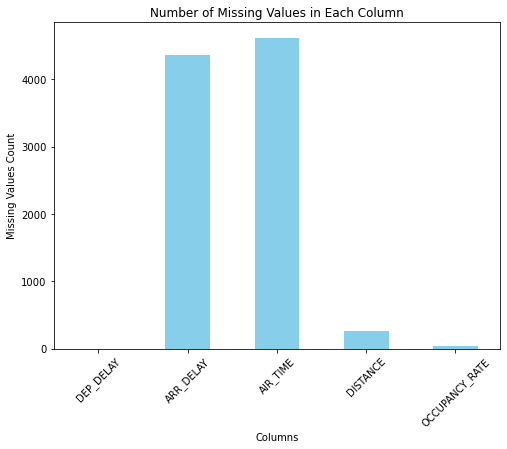

In [28]:
# Count missing values in each column
missing_counts = flights_missing_values.isnull().sum()
# Plot bar chart of missing value counts
plt.figure(figsize=(8, 6))
missing_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45)
plt.show()

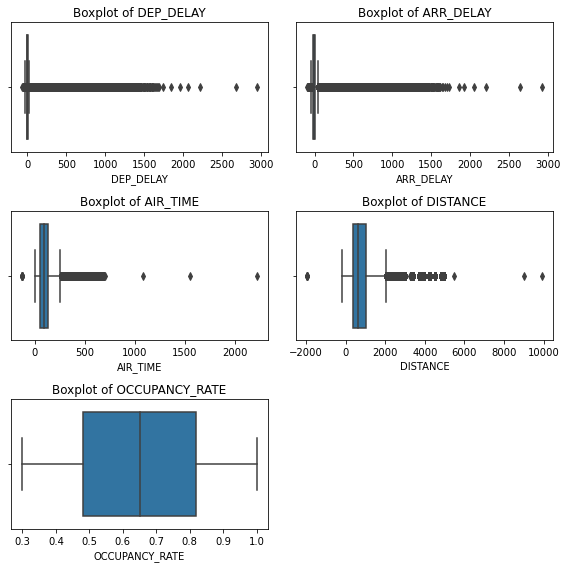

In [29]:
# Plotting separate boxplots for each column
num_cols = len(flights_missing_values.columns)
num_rows = (num_cols + 1) // 2  # Ensure enough rows for all columns

plt.figure(figsize=(8, 8))

# Iterate through each column and create a separate boxplot
for i, column in enumerate(flights_missing_values.columns):
    plt.subplot(num_rows, 2, i+1)  # Adjust subplot layout based on number of columns
    sns.boxplot(x=flights_missing_values[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

### Observations
- OCCUPANCY_RATE looks good
- Other columns outliers values needs to replaced 

- After the Visual Inspection, removing outliers for below columns might not be a feasible solution for this analysis as this contains real-time data
- So, I came up with Imputation Strategy
1. DEP_DELAY
2. ARR_DELAY
3. AIR_TIME
4. DISTANCE

#### Imputation
- Here, as the data is skewed/contains outliers so, replacing with "MEDIAN" of the respective columns will be most robust solution for this analysis

### Handling OUTLIERS

In [30]:
# Imputing missing values in columns with the median
impute_columns = ['DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE']
impute_with_median(flights, impute_columns)

In [31]:
flights.isna().sum()

FL_DATE               0
OP_CARRIER            0
TAIL_NUM              0
OP_CARRIER_FL_NUM     0
ORIGIN_AIRPORT_ID     0
ORIGIN                0
ORIGIN_CITY_NAME      0
DEST_AIRPORT_ID       0
DESTINATION           0
DEST_CITY_NAME        0
DEP_DELAY             0
ARR_DELAY             0
CANCELLED             0
AIR_TIME              0
DISTANCE              0
OCCUPANCY_RATE       31
dtype: int64

## Exploratory Data Analysis on TICKETS data

In [32]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167285 entries, 0 to 1167284
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ITIN_ID            1167285 non-null  int64  
 1   YEAR               1167285 non-null  int64  
 2   QUARTER            1167285 non-null  int64  
 3   ORIGIN             1167285 non-null  object 
 4   ORIGIN_COUNTRY     1167285 non-null  object 
 5   ORIGIN_STATE_ABR   1167285 non-null  object 
 6   ORIGIN_STATE_NM    1167285 non-null  object 
 7   ROUNDTRIP          1167285 non-null  float64
 8   REPORTING_CARRIER  1167285 non-null  object 
 9   PASSENGERS         1165308 non-null  float64
 10  ITIN_FARE          1166325 non-null  object 
 11  DESTINATION        1167285 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 106.9+ MB


### Convert Datatypes and Filter the data for only RoundTrips

In [33]:
tickets['ITIN_FARE'] = pd.to_numeric(tickets['ITIN_FARE'], errors='coerce')

# Optionally handle NaN values (e.g., filling with the median of the column)
#median_value = tickets['ITIN_FARE'].median()
#tickets['ITIN_FARE'].fillna(median_value, inplace=True)

In [34]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167285 entries, 0 to 1167284
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ITIN_ID            1167285 non-null  int64  
 1   YEAR               1167285 non-null  int64  
 2   QUARTER            1167285 non-null  int64  
 3   ORIGIN             1167285 non-null  object 
 4   ORIGIN_COUNTRY     1167285 non-null  object 
 5   ORIGIN_STATE_ABR   1167285 non-null  object 
 6   ORIGIN_STATE_NM    1167285 non-null  object 
 7   ROUNDTRIP          1167285 non-null  float64
 8   REPORTING_CARRIER  1167285 non-null  object 
 9   PASSENGERS         1165308 non-null  float64
 10  ITIN_FARE          1163149 non-null  float64
 11  DESTINATION        1167285 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 106.9+ MB


In [35]:
#Filter the Tickets data for only "roundtrips" 
tickets = tickets[tickets["ROUNDTRIP"] == 1].reset_index(drop=True)

In [36]:
tickets['ROUNDTRIP'].unique()

array([1.])

### Checking Duplicated rows

In [37]:
# Identify the duplicate rows 
duplicated_rows = tickets.duplicated()
duplicated_rows.unique()

array([False,  True])

In [38]:
tickets.duplicated().sum()

47564

In [39]:
# Dropping the 47564 duplicates with respect to all the columns 
tickets = tickets.drop_duplicates()

In [40]:
#checking number of null values in each column
tickets.isna().sum()

ITIN_ID                 0
YEAR                    0
QUARTER                 0
ORIGIN                  0
ORIGIN_COUNTRY          0
ORIGIN_STATE_ABR        0
ORIGIN_STATE_NM         0
ROUNDTRIP               0
REPORTING_CARRIER       0
PASSENGERS            960
ITIN_FARE            1657
DESTINATION             0
dtype: int64

### Observations
- After inspecting majority of the missing values are from below columns
1. PASSENGERS           
2. ITIN_FARE            

- Before deleting these missing values, lets check for any outliers

In [41]:
tickets_missing_values = tickets[['PASSENGERS', 'ITIN_FARE']]
tickets_missing_values

,PASSENGERS,ITIN_FARE
0,1.0,736.0
1,1.0,570.0
2,1.0,564.0
3,1.0,345.0
4,1.0,1647.0
...,...,...
672773,1.0,585.0
672775,1.0,692.0
672776,1.0,600.0
672778,1.0,705.0


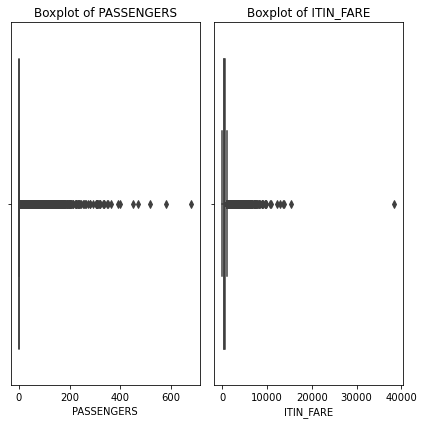

In [42]:
# Plotting separate boxplots for each column
num_cols = len(tickets_missing_values.columns)
num_rows = (num_cols + 1) // 2  # Ensure enough rows for all columns

plt.figure(figsize=(6, 6))

# Iterate through each column and create a separate boxplot
for i, column in enumerate(tickets_missing_values):
    plt.subplot(1, 2, i + 1)  # 1 row, 2 columns layout
    sns.boxplot(x=tickets_missing_values[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

### Observations

- After the Visual Inspection, removing outliers for below columns might not be a feasible solution for this analysis as this contains real-time data
- So, I came up with Imputation Strategy
1. PASSENGERS
2. ITIN_FARE

#### Imputation
- Here, as the data is skewed/contains outliers so, replacing with "MEDIAN" of the respective columns will be most robust solution for this analysis

### Handling OUTLIERS

In [43]:
# Imputing missing values in columns with the median
impute_columns_tickets = ['PASSENGERS', 'ITIN_FARE']
impute_with_median(tickets, impute_columns_tickets)

In [44]:
tickets.isna().sum()

ITIN_ID              0
YEAR                 0
QUARTER              0
ORIGIN               0
ORIGIN_COUNTRY       0
ORIGIN_STATE_ABR     0
ORIGIN_STATE_NM      0
ROUNDTRIP            0
REPORTING_CARRIER    0
PASSENGERS           0
ITIN_FARE            0
DESTINATION          0
dtype: int64

In [45]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661036 entries, 0 to 672779
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ITIN_ID            661036 non-null  int64  
 1   YEAR               661036 non-null  int64  
 2   QUARTER            661036 non-null  int64  
 3   ORIGIN             661036 non-null  object 
 4   ORIGIN_COUNTRY     661036 non-null  object 
 5   ORIGIN_STATE_ABR   661036 non-null  object 
 6   ORIGIN_STATE_NM    661036 non-null  object 
 7   ROUNDTRIP          661036 non-null  float64
 8   REPORTING_CARRIER  661036 non-null  object 
 9   PASSENGERS         661036 non-null  float64
 10  ITIN_FARE          661036 non-null  float64
 11  DESTINATION        661036 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 65.6+ MB


## Overview of Data Cleaning and Data Quality checks

### **Airports Codes Dataset:**
1. **Filtering for US Airports**:
   - Retained only rows where `ISO_COUNTRY` is 'US', ensuring the focus is solely on US domestic airports.
2. **Airport Type Filtering**:
   - Included only rows where `TYPE` is 'medium_airport' or 'large_airport'.
3. **Data Type Optimization**:
   - Optimized data types to enhance runtime performance.
4. **Column Reduction**:
   - Dropped the following non-essential columns: `CONTINENT`, `ISO_COUNTRY`, `MUNICIPALITY`, `COORDINATES`, `ELEVATION_FT`.
   - **Final Dataset**: `airport_codes`

### **Flights Dataset:**
1. **Cancelled Flights Exclusion**:
   - Excluded rows where `CANCELLED` equals 1.
2. **Date Format Standardization**:
   - Converted `FL_DATE` to 'YYYY-MM-DD' format.
3. **Data Type Conversion**:
   - Converted `AIR_TIME` and `DISTANCE` from object format to `float64`.
4. **Data Type Optimization**:
   - Optimized data types for improved runtime performance.
5. **Duplicate Removal**:
   - Removed 4,410 duplicate rows.
6. **Missing Value Imputation**:
   - Replaced missing values in `DEP_DELAY`, `ARR_DELAY`, `AIR_TIME`, and `DISTANCE` columns with the median to handle outliers.
   - **Final Dataset**: `flights`

### **Tickets Dataset:**
1. **Data Type Conversion**:
   - Converted `ITIN_FARE` from string to `float64`.
2. **Round Trip Filtering**:
   - Included only rows where `ROUNDTRIP` equals 1.
3. **Duplicate Removal**:
   - Removed 4,764 duplicate rows.
4. **Missing Value Imputation**:
   - Replaced missing values in `PASSENGERS` and `ITIN_FARE` columns with the median to address outliers.
   - **Final Dataset**: `tickets`

## MERGING DATASETS

 ### Instead of merging each individual ticket with flights and airport_codes, we plan to enhance efficiency by grouping tickets based on their origin and destination. This approach allows us to compute aggregate statistics such as the mean, reducing both time and complexity in the merging process.

### Similarly, we'll apply a similar aggregation strategy to the flights dataframe. By aggregating flight data based on origin and destination, we can summarize key metrics efficiently.

### After aggregating both tickets and flights dataframes separately, we will proceed to merge these aggregated datasets with the airport_codes dataframe. This streamlined approach minimizes redundant computations and optimizes the overall merging process.







In [46]:
tickets=tickets.groupby(['ORIGIN','DESTINATION']).agg({'ORIGIN_STATE_NM':'first',
                                                   'PASSENGERS': np.sum,
                                                   'ITIN_FARE': np.sum}).reset_index()

## cancelled is not needed as we have filtered already for non-cancelled flights but still taking count as it could be used to find total number of fligts in the route
flights=flights.groupby(['ORIGIN','DESTINATION']).agg({'ORIGIN_CITY_NAME':'first',
                                                                        'DEST_CITY_NAME': 'first',
                                                                        'DEP_DELAY': np.sum,
                                                                        'ARR_DELAY': np.sum,
                                                                        'AIR_TIME': np.sum,
                                                                        'DISTANCE': np.sum,
                                                                        'OCCUPANCY_RATE':np.sum,
                                                                        'CANCELLED':'count'}).reset_index()

In [47]:
# Merge tickets with flights on origin and destination
final = tickets.merge(flights, on=['ORIGIN', 'DESTINATION'], suffixes=('_tickets', '_flights'))

# Merge with airport_codes for origin airport details
final = final.merge(airport_codes, left_on='ORIGIN', right_on='IATA_CODE', suffixes=('', '_origin'))

# Merge with airport_codes again for destination airport details
final = final.merge(airport_codes, left_on='DESTINATION', right_on='IATA_CODE', suffixes=('_origin', '_destination'))

# Drop redundant columns
final.drop(columns=['IATA_CODE_origin', 'IATA_CODE_destination'], inplace=True)

# Rename column if necessary
final.rename(columns={'CANCELLED': 'total_count'}, inplace=True)

# Create route column for clarity
final['route'] = final['ORIGIN_CITY_NAME'] + ' TO ' + final['DEST_CITY_NAME']

# Create a copy of final data for safety
final_data = final.copy()

In [48]:
final_data.dtypes

ORIGIN               object
DESTINATION          object
ORIGIN_STATE_NM      object
PASSENGERS          float64
ITIN_FARE           float64
ORIGIN_CITY_NAME     object
DEST_CITY_NAME       object
DEP_DELAY           float32
ARR_DELAY           float32
AIR_TIME            float32
DISTANCE            float32
OCCUPANCY_RATE      float32
total_count           int64
TYPE_origin          object
NAME_origin          object
TYPE_destination     object
NAME_destination     object
route                object
dtype: object

# ANALYSIS



## QUESTION 1 - The 10 busiest round trip routes in terms of number of round trip flights in the quarter.
- Exclude canceled flights when performing the calculation. -- THE FLIGHTS DATA SET IS ALREADY FILTERED TO REMOVE THE CANCELLED FLIGHTS

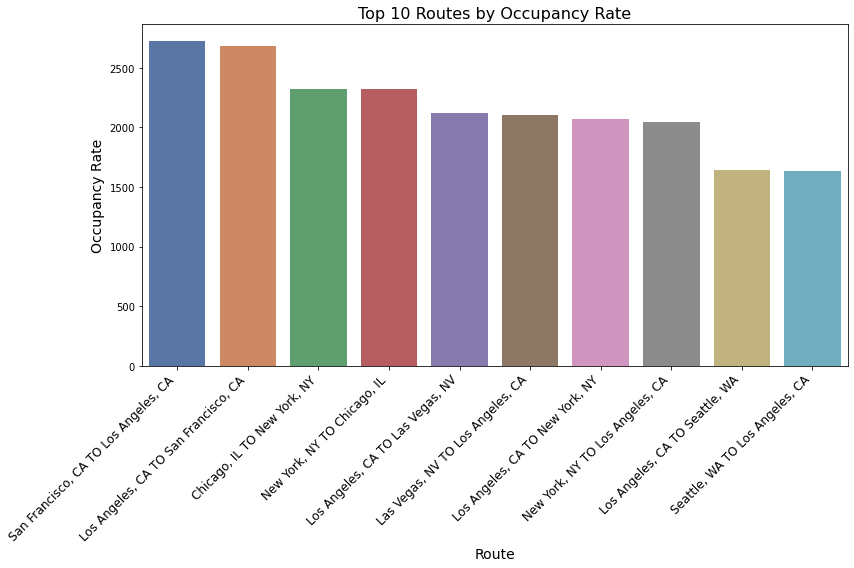

In [49]:
# Sort data to get top 10 routes with highest occupancy rates
top_routes = final_data.sort_values(by='OCCUPANCY_RATE', ascending=False).head(10)

# Create the bar plot using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='route', y='OCCUPANCY_RATE', data=top_routes, palette='deep')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)  # Adjust rotation and alignment of x-axis labels
ax.set_xlabel('Route', fontsize=14)
ax.set_ylabel('Occupancy Rate', fontsize=14)
ax.set_title('Top 10 Routes by Occupancy Rate', fontsize=16)
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()

### NOTES - "In analyzing the top 10 busiest round trip routes, each route is considered distinct regardless of the order of origin and destination. This approach ensures comprehensive coverage of all round trip journeys within the dataset."

## QUESTION 2 - The 10 most profitable round trip routes (without considering the upfront airplane cost) in the quarter. Along with the profit, show total revenue, total cost, summary values of other key components and total round trip flights in the quarter for the top 10 most profitable routes.
- Exclude canceled flights from these calculations. -- THE FLIGHTS DATA SET IS ALREADY FILTERED TO REMOVE THE CANCELLED FLIGHTS

Esimates given in the Challenge are as follows:

1) Fuel, Oil, Maintenance, Crew $8 per mile total

2) Depreciation, Insurance, Other $1.18 per mile total

3) Airport operational costs for the right to use the airports and related services are fixed at 5000 dollars for medium airports and 10,000 dollars for large airports. There is one charge for each airport where a flight lands. Thus, a round trip flight has a total of two airport charges.

4) For each individual departure, the first 15 minutes of delays are free, otherwise each minute costs the airline $75 in added operational costs.

5) For each individual arrival, the first 15 minutes of delays are free, otherwise each minute costs the airline $75 in added operational costs

6) Each plane can accommodate up to 200 passengers and each flight has an associated occupancy rate provided in the Flights data set. Do not use the Tickets data set to determine occupancy.

7) Baggage fee is 35 dollars for each checked bag per flight. We expect 50% of passengers to check an average of 1 bag per flight. The fee is charged separately for each leg of a round trip flight, thus 50% of passengers will be charged a total of 70 dollars in baggage fees for a round trip flight.

8) Disregard seasonal effects on ticket prices (i.e. ticket prices are the same in April as they are on Memorial Day or in December)

In [50]:
final_data=final_data[['route','PASSENGERS','ITIN_FARE','DEP_DELAY','ARR_DELAY','DISTANCE','OCCUPANCY_RATE','total_count','TYPE_origin','TYPE_destination']]

In [51]:
## All calculations. 
final_data['total_fare']=final_data['PASSENGERS']*final_data['ITIN_FARE']
final_data['baggage_cost']=final_data['OCCUPANCY_RATE']*70*0.5
final_data['arr_delay_cost']=final_data['ARR_DELAY']*75
final_data['dep_delay_cost']=final_data['DEP_DELAY']*75
final_data['airport_cost']=np.where((final_data['TYPE_origin']=='medium_airport'),final_data['total_count']*5000 , final_data['total_count']*10000)
final_data['airport_cost']=np.where((final_data['TYPE_destination']=='medium_airport'),final_data['airport_cost']+final_data['total_count']*5000 , final_data['airport_cost']+final_data['total_count']*10000)
final_data['essentials_cost']=final_data['DISTANCE']*9.18
final_data['income']=final_data['total_fare']+final_data['baggage_cost']
final_data['cost']=final_data['arr_delay_cost']+final_data['dep_delay_cost']+final_data['airport_cost']+final_data['essentials_cost']


## Total Profit generated by a route in a quarter.

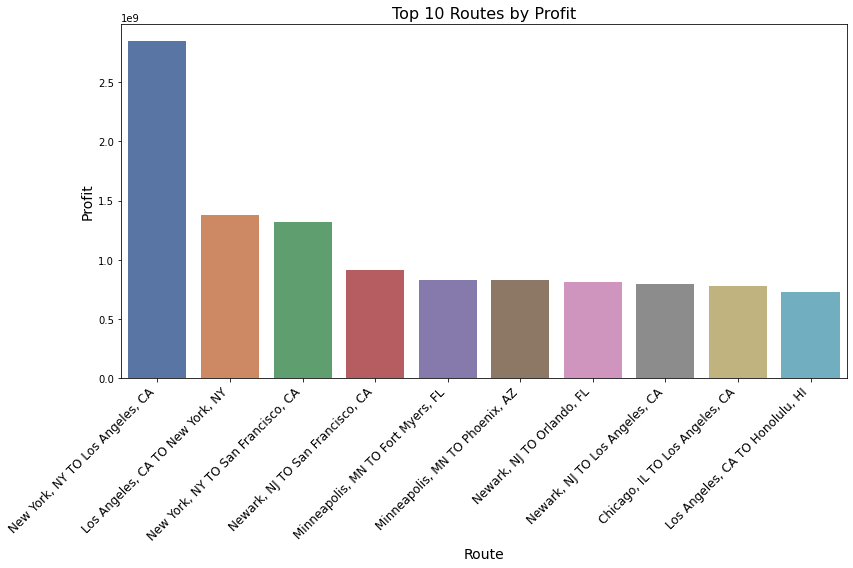

In [52]:
final_data['profit']=final_data['income']-final_data['cost']
# Sort data to get top 10 routes with highest profit
top_routes_profit = final_data.sort_values(by='profit', ascending=False).head(10)

# Create bar plot with seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='route', y='profit', data=top_routes_profit, palette='deep')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)  # Adjust rotation and alignment of x-axis labels
ax.set_xlabel('Route', fontsize=14)
ax.set_ylabel('Profit', fontsize=14)
ax.set_title('Top 10 Routes by Profit', fontsize=16)
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()

## Total Profit generated by a route in 1 round trip .

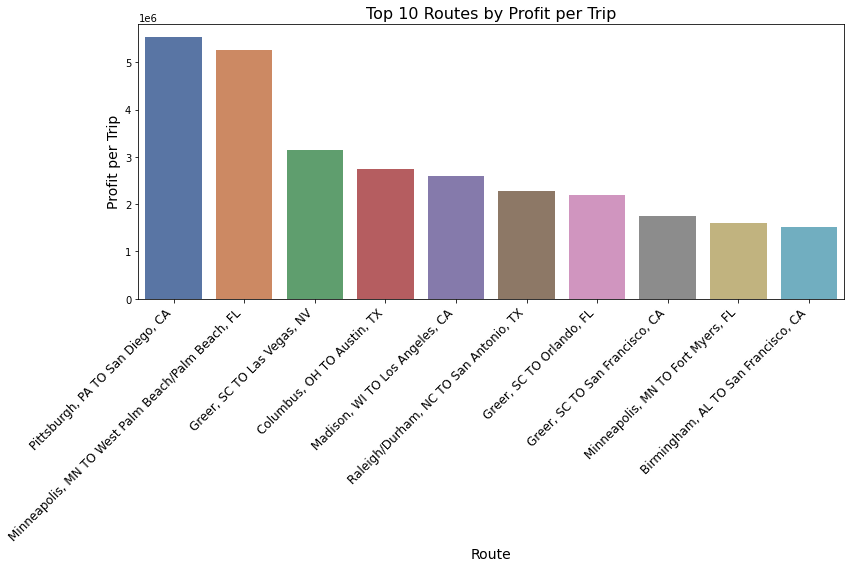

In [53]:
# Calculate profit per trip
final_data['profit_per_trip'] = final_data['profit'] / final_data['total_count']

# Select top 10 routes by profit per trip
top_routes = final_data.sort_values(by='profit_per_trip', ascending=False).head(10)


# Create bar plot using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='route', y='profit_per_trip', data=top_routes, palette='deep')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)  # Adjust rotation and alignment of x-axis labels
ax.set_xlabel('Route', fontsize=14)
ax.set_ylabel('Profit per Trip', fontsize=14)
ax.set_title('Top 10 Routes by Profit per Trip', fontsize=16)
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()

### NOTES 

- To gain a clearer understanding of our market strategy and revenue potential, we need to refine our analysis. While identifying the busiest round trip routes provides a vivid snapshot, it's crucial to align our focus with profitable opportunities.

- Let's enhance our analysis by categorizing airports based on their operational intensity. This includes determining whether an airport qualifies as 'busy,' ensuring our efforts are directed towards maximizing customer engagement and revenue generation.

## Creating Busy Column

#### Methodology for Identifying Busy Airports:

1. Operational Capacity: We operate a fleet of 5 aircraft.

2. Flight Frequency: Each aircraft can potentially operate daily, resulting in a maximum of 450 flights over a quarter (approximating 90 days).

3. Profitability Consideration: To ensure profitability, we aim to utilize airports where flight operations exceed a certain threshold.

4. Adjustment for Seasonality: Considering potential seasonal variations, we increase our threshold by 20%.

5. Definition of Busy Airports: Airports with a total_count (number of flights) exceeding 600 are considered busy, indicating significant operational activity.

- This approach integrates operational capacity, profitability considerations, and seasonal adjustments to effectively identify airports with substantial flight activity, aligning with strategic decision-making in aviation operations.


In [54]:
# Identifying busy routes based on a threshold of 600 total flights
final_data['busy_route'] = np.where(final_data['total_count'] >= 600, 1, 0)

## Total Profit generated by a route in 1 round trip in busy routes

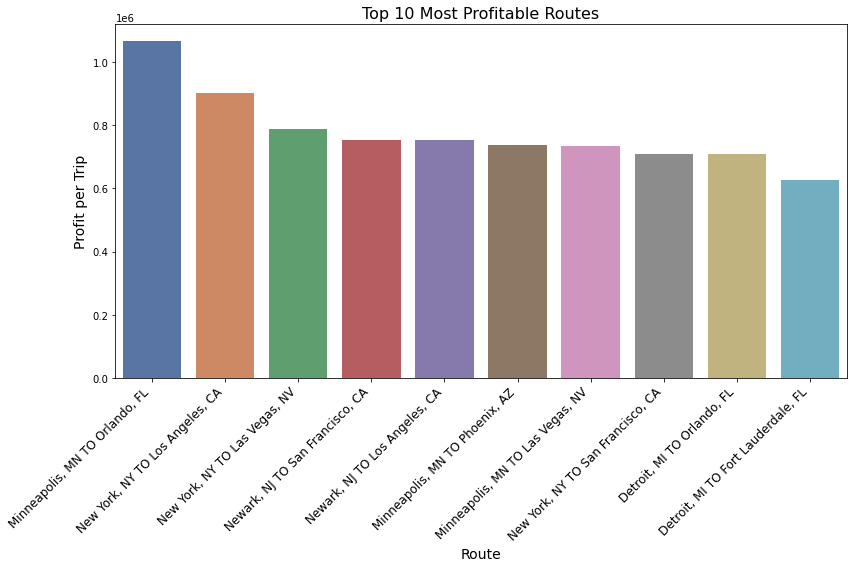

In [55]:
# Filter data for the top 10 most profitable routes
top_profitable_routes = final_data[final_data['busy_route'] == 1].sort_values(by='profit_per_trip', ascending=False).head(10)



plt.figure(figsize=(12, 8))
ax = sns.barplot(x='route', y='profit_per_trip', data=top_profitable_routes, palette='deep')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_xlabel('Route', fontsize=14)
ax.set_ylabel('Profit per Trip', fontsize=14)
ax.set_title('Top 10 Most Profitable Routes', fontsize=16)
plt.tight_layout()
plt.show()

## Top 10 Least Delay in busy routes

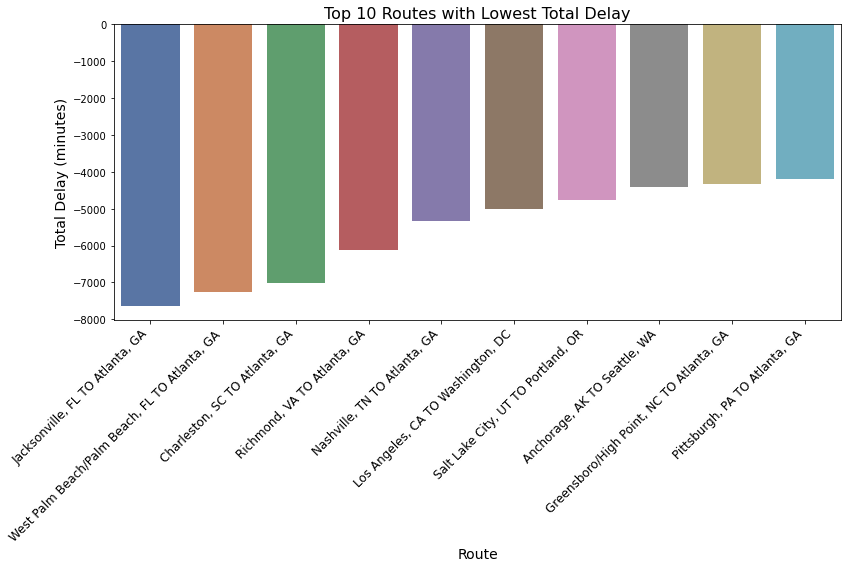

In [56]:
# Calculate total delay combining departure and arrival delays
final_data['total_delay'] = final_data['DEP_DELAY'] + final_data['ARR_DELAY']

# Filter data for the busiest routes
busiest_routes = final_data[final_data['busy_route'] == 1]

# Select the top 10 routes with the lowest total delay
top_routes_delay = busiest_routes.sort_values(by='total_delay', ascending=True).head(10)

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='route', y='total_delay', data=top_routes_delay, palette='deep')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_xlabel('Route', fontsize=14)
ax.set_ylabel('Total Delay (minutes)', fontsize=14)
ax.set_title('Top 10 Routes with Lowest Total Delay', fontsize=16)
plt.tight_layout()
plt.show()

### Strategic Goals:
1. Maximize Profitability: Enhance revenue generation through strategic initiatives.
2. Expand Customer Base: Increase market share and customer acquisition.
3. Operational Excellence: Ensure punctuality with our commitment to "On time, for you".

#### Development of Score Metric:
- To quantify our performance across these goals, we will establish a unified scoring system:

1. Normalization:

- Profitability and Total Flights: Scores ranging from 0 to 1, where higher scores indicate better performance.
- Delay: Inverse score normalized between 0 and 1, reflecting our commitment to minimizing delays.
2. Score Calculation:

- Weighted Average: Combining metrics with the following weights:
    - Delay: 40%
    - Total Flights: 30%
    - Profitability: 30%
This metric will serve as a comprehensive measure of our operational effectiveness and strategic alignment with company objectives.

In [57]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Select data for busy routes
busy_routes_data = final_data[final_data['busy_route'] == 1]

# Select columns to scale and transform
columns_to_scale = ['total_delay', 'profit_per_trip', 'total_count']
scaled_data = min_max_scaler.fit_transform(busy_routes_data[columns_to_scale])

# Inverse transform and assign scaled values back to DataFrame
busy_routes_data['delay_scaled'] = 1 - scaled_data[:, 0]
busy_routes_data['profit_per_trip_scaled'] = scaled_data[:, 1]
busy_routes_data['total_count_scaled'] = scaled_data[:, 2]

# Calculate score based on weighted average
busy_routes_data['score'] = 0.33 * busy_routes_data['delay_scaled'] + \
                           0.33 * busy_routes_data['profit_per_trip_scaled'] + \
                           0.33 * busy_routes_data['total_count_scaled']

<ipython-input-57-7f2613bd56d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busy_routes_data['delay_scaled'] = 1 - scaled_data[:, 0]
<ipython-input-57-7f2613bd56d5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busy_routes_data['profit_per_trip_scaled'] = scaled_data[:, 1]
<ipython-input-57-7f2613bd56d5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

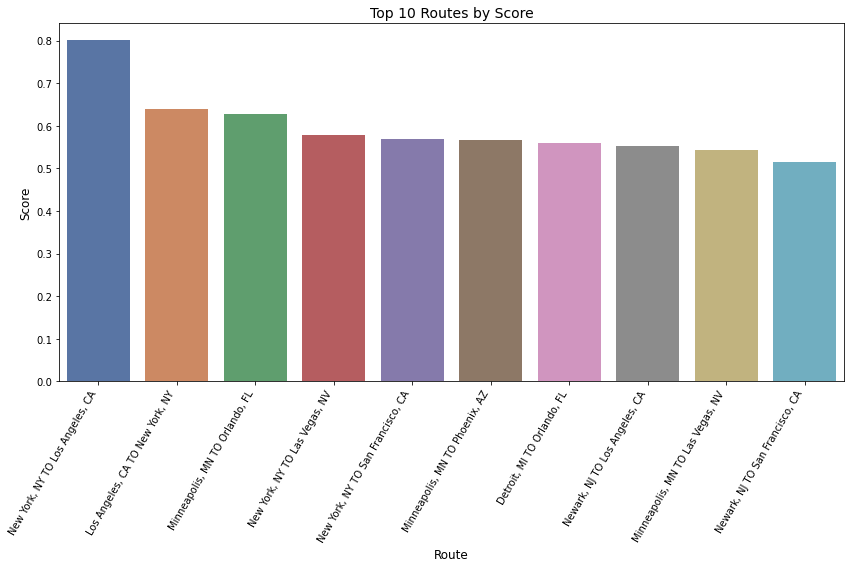

In [58]:
# Sort 'temp' by 'score' in descending order to get top 10 routes
top_routes = busy_routes_data.sort_values(by='score', ascending=False).head(10)

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='route', y='score', data=top_routes, palette='deep')
ax.set_xlabel('Route', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=10)
ax.set_title('Top 10 Routes by Score', fontsize=14)
plt.tight_layout()
plt.show()

## QUESTION 3 -  The 5 round trip routes that you recommend to invest in based on any factors that you choose.

## Recommended Routes:

1. New York, NY to Los Angeles, CA
2. Los Angeles, CA to New York, NY
3. Minneapolis, MN to Orlando, FL
4. New York, NY to Las Vegas, NV
5. New York, NY to San Francisco, CA

### Rationale:
These routes are recommended based on a comprehensive weighted average analysis that includes key performance indicators such as delay times (`delay_scaled`), profitability per trip (`profit_per_trip_scaled`), and the total number of flights (`total_count_scaled`).

By evaluating these metrics together, the company can achieve a balanced approach that maximizes both profitability and operational efficiency. Prioritizing routes with favorable scores across these metrics ensures the company maintains its reputation for punctuality while optimizing financial performance.

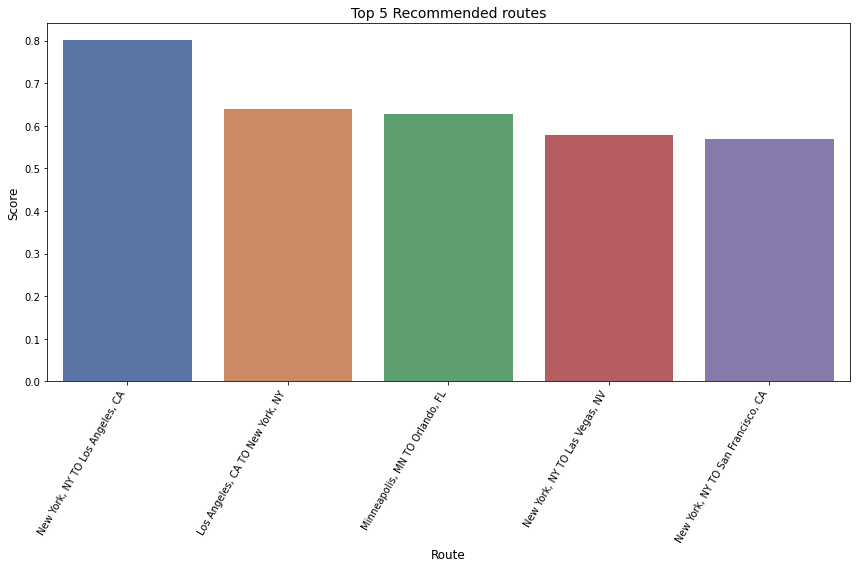

In [59]:
# Sort 'temp' by 'score' in descending order to get top 10 routes
top_routes = busy_routes_data.sort_values(by='score', ascending=False).head(5)

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='route', y='score', data=top_routes, palette='deep')
ax.set_xlabel('Route', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=10)
ax.set_title('Top 5 Recommended routes', fontsize=14)
plt.tight_layout()
plt.show()

## Question 4 -  The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trip routes that you recommend. Print key summary components for these routes.

In [60]:
top_routes=top_routes.assign(NUMBER_OF_TRIPS_TO_BREAKEVEN = lambda x: ((90000000/x['profit_per_trip'])))



top_routes.assign(NUMBER_OF_TRIPS_TO_BREAKEVEN = lambda x: ((90000000/x['profit_per_trip']))).to_excel('Final_Solution_4.xlsx')
print(top_routes)

                                  route  PASSENGERS  ITIN_FARE  DEP_DELAY  \
1585    New York, NY TO Los Angeles, CA      3580.0   833288.0    15822.0   
1399    Los Angeles, CA TO New York, NY      2265.0   670204.0    38189.0   
1739     Minneapolis, MN TO Orlando, FL      2529.0   272637.0     7124.0   
1485      New York, NY TO Las Vegas, NV      1646.0   438812.0     5260.0   
2321  New York, NY TO San Francisco, CA      1803.0   778869.0    26847.0   

      ARR_DELAY   DISTANCE  OCCUPANCY_RATE  total_count    TYPE_origin  \
1585     -332.0  7816050.0     2042.729980         3158  large_airport   
1399   -11701.0  7825950.0     2065.739990         3162  large_airport   
1739     2161.0   822680.0      410.540009          628  large_airport   
1485     -891.0  1958008.0      563.650024          871  large_airport   
2321    15346.0  4809960.0     1218.260010         1860  large_airport   

     TYPE_destination  ...         cost        profit  profit_per_trip  \
1585    large_airp

In [61]:
top_routes[['ITIN_FARE','DEP_DELAY','ARR_DELAY','total_count','cost','profit','total_delay','NUMBER_OF_TRIPS_TO_BREAKEVEN']]

,ITIN_FARE,DEP_DELAY,ARR_DELAY,total_count,cost,profit,total_delay,NUMBER_OF_TRIPS_TO_BREAKEVEN
1585,833288.0,15822.0,-332.0,3158,136073094.0,2.847169e+09,15490.0,99.825460
1399,670204.0,38189.0,-11701.0,3162,137068824.0,1.381016e+09,26488.0,206.065748
1739,272637.0,7124.0,2161.0,628,20808577.5,6.687048e+08,9285.0,84.521605
1485,438812.0,5260.0,-891.0,871,35722189.0,6.865821e+08,4369.0,114.174257
2321,778869.0,26847.0,15346.0,1860,84519911.0,1.319824e+09,42193.0,126.835138


**Route1    New York,NY to Los Angeles,CA**


**Route2    Los Angeles,CA to New York,NY**

**Route3    Minnepolis,MN to ORLANDO, FL**

**Route4    New York,NY to Las Vegas, NV**

**Route5    New York,NY to San Francisco, CA**

## Q5) Key Performance Indicators (KPI’s) that you recommend tracking in the future to measure the success of the round trip routes that you recommend.

Essential KPI's which are already given are 

1. Distance
2. Fare
3. Arrival Delay
4. Departure Delay
5. Occupancy Rate


Additional Key Performance Indicators (KPIs) for Airline Analysis:

In addition to essential metrics like distance, fare, arrival/departure delays, and occupancy rate, the following KPIs provide crucial insights:

1. Seat Distribution: Segmentation between Business and Economy classes guides pricing strategies and service offerings.

2. Target Audience Analysis: Demographic insights optimize marketing and service customization.

3. Local Economic Factors: Income levels impact demand for premium travel and route profitability.

4. Promotions and Pricing: Monitoring discounts and promotional strategies informs revenue management.

5. Airport Load Factors: Identifying high-load airports improves operational efficiency and reduces delays.

6. Weather Impacts: Weather analysis enhances schedule reliability and passenger satisfaction.

7. Government Support: Policies supporting tourism and business drive route expansion opportunities.

8. Flight Change Management: Minimizing disruptions from flight changes enhances customer experience.

9. Onboard Services Analysis: Revenue and cost assessment of onboard services impacts profitability.

These KPIs enable comprehensive analysis, supporting strategic decisions to optimize operations, revenue, and customer satisfaction in the airline industry.